In [9]:
import pickle,gzip,math,os,time,shutil,torch,matplotlib as mpl, numpy as np
from pathlib import Path
from torch import tensor

In [10]:
torch.manual_seed(42)

mpl.rcParams['image.cmap'] = 'gray'
torch.set_printoptions(precision=2, linewidth=125, sci_mode=False)
np.set_printoptions(precision=2, linewidth=125)

In [32]:
!wget https://github.com/mnielsen/neural-networks-and-deep-learning/raw/master/data/mnist.pkl.gz -P data/

--2024-02-19 02:24:44--  https://github.com/mnielsen/neural-networks-and-deep-learning/raw/master/data/mnist.pkl.gz
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mnielsen/neural-networks-and-deep-learning/master/data/mnist.pkl.gz [following]
--2024-02-19 02:24:44--  https://raw.githubusercontent.com/mnielsen/neural-networks-and-deep-learning/master/data/mnist.pkl.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17051982 (16M) [application/octet-stream]
Saving to: ‘data/mnist.pkl.gz’

mnist.pkl.gz        100%[===================>]  16.26M  91.0MB/s    in 0.2s    

2024-02-19 02:24:44 (91.0 MB

In [33]:
import gzip
import shutil

# Define the path to the gzip (.gz) file
gz_file_path = 'data/mnist.pkl.gz'
# Define the output path for the decompressed file (same directory, without .gz)
pkl_file_path = gz_file_path.rstrip('.gz')

# Decompress the .gz file and write the contents to a new file
with gzip.open(gz_file_path, 'rb') as f_in:
    with open(pkl_file_path, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

print(f"Unzipped file saved to: {pkl_file_path}")


Unzipped file saved to: data/mnist.pkl


In [35]:
with open(pkl_file_path, 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [36]:
x_train, y_train, x_valid, y_valid = map(tensor, [x_train, y_train, x_valid, y_valid])

In [37]:
x_train.shape

torch.Size([50000, 784])

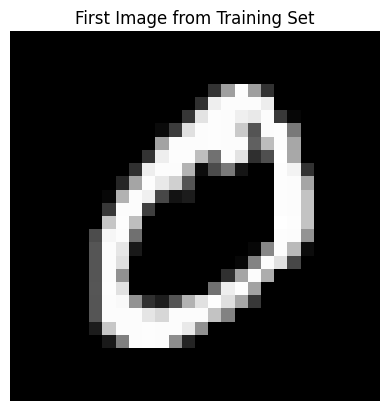

In [42]:
import matplotlib.pyplot as plt

first_image = x_train[1]

# Assuming first_image is a flattened array of shape (784,)
# Reshape it to 2D array (28, 28) for MNIST images
first_image_reshaped = first_image.reshape(28, 28)

# Now use matplotlib to display the reshaped image
plt.imshow(first_image_reshaped, cmap='gray')
plt.title('First Image from Training Set')
plt.axis('off')
plt.show()